<a href="https://colab.research.google.com/github/LukaJurisic/Kaggle-Data-Challenge---Ames_House_Prices/blob/main/Ames_House_Clean_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the Ames Housing dataset ("train.csv", "test.csv", "sample_submission.csv") by building a regression pipeline.
1. Load and clean train/test data.
2. Log-transform 'SalePrice' using `np.log1p`.
3. Impute missing values: median for numerics, 'Missing' for categoricals.
4. Encode categoricals using one-hot encoding.
5. Train baseline `LinearRegression` and `RandomForestRegressor`.
6. Report RMSE (on log-transformed target) and briefly explain feature importance.
Ensure no data leakage and output a clean submission CSV with 'Id' and predicted 'SalePrice'.

## Load data

### Subtask:
Load the train and test datasets.


**Reasoning**:
Load the training and test data into pandas DataFrames.



In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print('Train data shape:', train_df.shape)
print('Test data shape:', test_df.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


## Log transform target

### Subtask:
Apply log1p transformation to the 'SalePrice' in the training data.


**Reasoning**:
Apply the log1p transformation to the 'SalePrice' column in the training data.



In [ ]:
import numpy as np

train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

## Identify column types

### Subtask:
Separate numerical and categorical features.


**Reasoning**:
Identify numerical and categorical columns in the training data, excluding 'Id' and 'SalePrice', and store them in separate lists.



In [ ]:
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Id')
numerical_cols.remove('SalePrice')

categorical_cols = train_df.select_dtypes(exclude=np.number).columns.tolist()

## Impute missing values

### Subtask:
Fill missing values in numerical features with the median and in categorical features with 'Missing'.


**Reasoning**:
Fill missing values in numerical columns with the median and in categorical columns with 'Missing' for both train and test dataframes.



In [ ]:
for col in numerical_cols:
    median_val = train_df[col].median()
    train_df[col].fillna(median_val, inplace=True)
    test_df[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    train_df[col].fillna('Missing', inplace=True)
    test_df[col].fillna('Missing', inplace=True)

print("Missing values after imputation in train_df:")
display(train_df.isnull().sum().sum())
print("Missing values after imputation in test_df:")
display(test_df.isnull().sum().sum())

Missing values after imputation in train_df:


/tmp/ipython-input-4-267695774.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-4-267695774.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

np.int64(0)

Missing values after imputation in test_df:


np.int64(0)

## Encode categorical features

### Subtask:
Apply one-hot encoding to the categorical features.


**Reasoning**:
Concatenate train and test data, apply one-hot encoding, and then split back into train and test sets.



In [ ]:
import pandas as pd

train_rows = train_df.shape[0]
test_rows = test_df.shape[0]

# Concatenate the dataframes (dropping 'SalePrice' from train_df for concatenation)
all_df = pd.concat([train_df.drop('SalePrice', axis=1), test_df], ignore_index=True)

# Apply one-hot encoding to the combined dataframe
all_df_encoded = pd.get_dummies(all_df)

# Separate the combined dataframe back into training and testing dataframes
train_df_encoded = all_df_encoded.iloc[:train_rows, :]
test_df_encoded = all_df_encoded.iloc[train_rows:, :]

print('Encoded train data shape:', train_df_encoded.shape)
print('Encoded test data shape:', test_df_encoded.shape)

Encoded train data shape: (1460, 311)
Encoded test data shape: (1459, 311)


## Train baseline models

### Subtask:
Train Linear Regression and RandomForestRegressor models.


**Reasoning**:
Import the necessary models and define the features and target variables for training. Then train the Linear Regression and RandomForestRegressor models.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target (y) for training
X_train = train_df_encoded
y_train = train_df['SalePrice']

# Instantiate and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Instantiate and train RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate baseline models

### Subtask:
Calculate and report the RMSE for both models on the log-transformed target.


**Reasoning**:
Calculate the RMSE for both models on the log-transformed target variable.



In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the training data
y_pred_lr = lr_model.predict(X_train)
y_pred_rf = rf_model.predict(X_train)

# Calculate MSE for both models
mse_lr = mean_squared_error(y_train, y_pred_lr)
mse_rf = mean_squared_error(y_train, y_pred_rf)

# Calculate RMSE for both models
rmse_lr = np.sqrt(mse_lr)
rmse_rf = np.sqrt(mse_rf)

# Print the RMSE values
print(f'Linear Regression RMSE: {rmse_lr:.4f}')
print(f'RandomForestRegressor RMSE: {rmse_rf:.4f}')

Linear Regression RMSE: 0.0945
RandomForestRegressor RMSE: 0.0538


## Report feature importance

### Subtask:
Briefly explain feature importance for one of the baseline models.


**Reasoning**:
Access the feature importances from the trained Random Forest model, create a Series with feature names, sort them, and print the top 10.



In [ ]:
# Access feature importances
feature_importances = rf_model.feature_importances_

# Create a pandas Series
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort importances
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print top 10 features and their importance scores
print("Top 10 Feature Importances (RandomForestRegressor):")
display(sorted_feature_importances.head(10))

# Briefly explain what these features suggest about their influence
print("\nExplanation of Top Features:")
print("The top features, such as OverallQual, GrLivArea, and YearBuilt, indicate that the overall quality and condition of the house, its living area size, and its age are the most influential factors in determining the sale price.")

Top 10 Feature Importances (RandomForestRegressor):


,0
OverallQual,0.545797
GrLivArea,0.114984
TotalBsmtSF,0.046313
GarageCars,0.040910
GarageArea,0.023933
BsmtFinSF1,0.021620
1stFlrSF,0.021503
YearBuilt,0.015751
OverallCond,0.012508
LotArea,0.011694



Explanation of Top Features:
The top features, such as OverallQual, GrLivArea, and YearBuilt, indicate that the overall quality and condition of the house, its living area size, and its age are the most influential factors in determining the sale price.


## Summary:

### Data Analysis Key Findings

*   The target variable 'SalePrice' was successfully log-transformed using `np.log1p`.
*   Missing numerical values were imputed with the median from the training data, and missing categorical values were imputed with the string 'Missing'. After imputation, both the training and testing datasets had zero missing values.
*   One-hot encoding was applied to the categorical features, resulting in 311 features in both the encoded training and testing datasets.
*   Baseline Linear Regression and RandomForestRegressor models were trained on the processed data.
*   On the log-transformed training data, the Linear Regression model achieved an RMSE of approximately 0.0945.
*   On the log-transformed training data, the RandomForestRegressor model achieved a lower RMSE of approximately 0.0538, indicating better performance on the training set.
*   According to the RandomForestRegressor model's feature importance, the most influential factors for predicting the sale price are 'OverallQual' (overall material and finish quality), 'GrLivArea' (above-grade living area square feet), and 'YearBuilt' (original construction date).

### Insights or Next Steps

*   The significant difference between the training RMSE of the two models suggests that the RandomForestRegressor captures non-linear relationships and interactions better than Linear Regression. However, this is training set performance and cross-validation is needed to assess generalization.
*   The identified top features ('OverallQual', 'GrLivArea', 'YearBuilt') are highly intuitive drivers of house prices, confirming the model's findings align with common real estate knowledge. Further analysis could involve exploring interactions between these key features.


# Task
Perform a regression analysis on the Ames Housing dataset ("train.csv", "test.csv") to predict SalePrice. The analysis should include data loading, cleaning, log-transformation of the target, imputation of missing values (median for numeric, 'Missing' for categorical), and encoding of categorical features. Train baseline LinearRegression and RandomForestRegressor models, reporting their log-RMSE and feature importance. Then, train and evaluate XGBoost and LightGBM models using 5-fold cross-validation, reporting log-RMSE and converting predictions back to the original scale for an ensembled prediction. Report the RMSLE of the ensemble. Finally, tune either XGBoost or LightGBM using Optuna (10 trials, 3-fold CV, early stopping, max_depth <= 10, pruning, moderate learning rates) to minimize RMSLE directly. Retrain the best tuned model on the full training data and generate a submission file ("submission_rmsle_optuna.csv") with 'Id' and predicted 'SalePrice'. Ensure no data leakage, consistent splits, and a clean submission format. Optionally, show top 10 features using SHAP or native importance. Use "sample_submission.csv" and "data_description.txt" as reference.

## Train xgboost and lightgbm

### Subtask:
Train XGBoost and LightGBM regressors.


**Reasoning**:
Import XGBoost and LightGBM regressors, instantiate them, and train them on the training data.



In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate and train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Instantiate and train LightGBM model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3744
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 203
[LightGBM] [Info] Start training from score 12.024057


LGBMRegressor(random_state=42)

## Evaluate with 5-fold cv

### Subtask:
Evaluate the models using 5-fold cross-validation and calculate the log-RMSE.


**Reasoning**:
Define a custom RMSE scorer using negative mean squared error and then perform 5-fold cross-validation for both XGBoost and LightGBM models using this scorer to calculate the average log-RMSE.



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# Define a scoring function for RMSE (using negative MSE as cross_val_score minimizes)
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create a scorer object using make_scorer
neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 5-fold cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=neg_mse_scorer)

# Calculate the mean and standard deviation of the XGBoost CV scores (convert back to positive RMSE)
xgb_log_rmse_mean = np.sqrt(-xgb_cv_scores.mean())
xgb_log_rmse_std = np.sqrt(xgb_cv_scores.std()) # Note: This is std of MSE, sqrt of this is not std of RMSE

print(f'XGBoost 5-fold Cross-Validation Log-RMSE: {xgb_log_rmse_mean:.4f} ± {xgb_log_rmse_std:.4f}')

# Perform 5-fold cross-validation for LightGBM
lgbm_cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring=neg_mse_scorer)

# Calculate the mean and standard deviation of the LightGBM CV scores (convert back to positive RMSE)
lgbm_log_rmse_mean = np.sqrt(-lgbm_cv_scores.mean())
lgbm_log_rmse_std = np.sqrt(lgbm_cv_scores.std()) # Note: This is std of MSE, sqrt of this is not std of RMSE


print(f'LightGBM 5-fold Cross-Validation Log-RMSE: {lgbm_log_rmse_mean:.4f} ± {lgbm_log_rmse_std:.4f}')

XGBoost 5-fold Cross-Validation Log-RMSE: 0.1427 ± 0.0593
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3458
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 197
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3468
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 193
[LightGBM] [Info] Star

## Convert predictions and ensemble

### Subtask:
Convert predictions back to the original scale using `np.expm1` and create an ensemble prediction by averaging the predictions of XGBoost and LightGBM.


**Reasoning**:
Make predictions on the test data using the trained XGBoost and LightGBM models, then inverse transform the predictions and create an ensemble.



In [ ]:
# Make predictions on the test data (log-transformed scale)
y_pred_xgb_log = xgb_model.predict(test_df_encoded)
y_pred_lgbm_log = lgbm_model.predict(test_df_encoded)

# Convert predictions back to the original scale
y_pred_xgb = np.expm1(y_pred_xgb_log)
y_pred_lgbm = np.expm1(y_pred_lgbm_log)

# Create an ensemble prediction by averaging
ensemble_predictions = (y_pred_xgb + y_pred_lgbm) / 2

# Display the first few ensemble predictions
print("First 5 ensemble predictions (original scale):")
display(ensemble_predictions[:5])

First 5 ensemble predictions (original scale):


array([124204.72014276, 149008.629216  , 186673.29303345, 185556.10249138,
       182362.86523204])

## Report rmsle

### Subtask:
Calculate and report the Root Mean Squared Log Error (RMSLE) on the ensembled predictions.


**Reasoning**:
Calculate the RMSLE using the training data's original SalePrice and the ensemble predictions corresponding to the training data.



In [ ]:
from sklearn.metrics import mean_squared_log_error

# Since we don't have the actual SalePrice for the test set,
# we'll use the training data's original SalePrice and make predictions on the training data
# to get an indicative RMSLE.
y_pred_xgb_train_log = xgb_model.predict(X_train)
y_pred_lgbm_train_log = lgbm_model.predict(X_train)

# Convert training predictions back to original scale
y_pred_xgb_train = np.expm1(y_pred_xgb_train_log)
y_pred_lgbm_train = np.expm1(y_pred_lgbm_train_log)

# Create ensemble predictions for the training data
ensemble_predictions_train = (y_pred_xgb_train + y_pred_lgbm_train) / 2

# Get the original SalePrice for the training data
y_train_original = np.expm1(y_train)

# Calculate MSLE using the original y_train and ensemble predictions on train
msle_ensemble = mean_squared_log_error(y_train_original, ensemble_predictions_train)

# Calculate RMSLE
rmsle_ensemble = np.sqrt(msle_ensemble)

print(f'Ensemble (XGBoost + LightGBM) Training RMSLE: {rmsle_ensemble:.4f}')

Ensemble (XGBoost + LightGBM) Training RMSLE: 0.0254


## Optuna tuning

### Subtask:
Tune either XGBoost or LightGBM using Optuna to minimize RMSLE.


**Reasoning**:
Define the Optuna objective function for LightGBM, create a study, and run the optimization for 10 trials to find the best hyperparameters minimizing RMSLE using 3-fold cross-validation.



In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 21.8 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from lightgbm import LGBMRegressor
import lightgbm as lgb

# Define the objective function for Optuna
def objective(trial):
    """Objective function for Optuna to optimize LightGBM hyperparameters."""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10), # Constraint: max_depth <= 10
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'random_state': 42,
        'n_jobs': -1
    }

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmsle_scores = []

    # Use X_train and y_train for cross-validation
    X = X_train.copy()
    y = y_train.copy()

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        model = LGBMRegressor(**params)
        model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  callbacks=[lgb.early_stopping(50, verbose=False)]) # Use callbacks for early stopping

        # Predict on the validation set (log-transformed)
        y_pred_log = model.predict(X_val_fold)

        # Convert predictions and actual values back to original scale for RMSLE
        y_pred_original = np.expm1(y_pred_log)
        y_val_original = np.expm1(y_val_fold)

        # Calculate RMSLE
        rmsle = np.sqrt(mean_squared_log_error(y_val_original, y_pred_original))
        rmsle_scores.append(rmsle)

        # Report intermediate score for pruning
        trial.report(rmsle, fold)

        # Handle pruning
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return np.mean(rmsle_scores)

# Create a study object and specify the direction is 'minimize'
study = optuna.create_study(direction='minimize')

# Run the optimization for 10 trials
study.optimize(objective, n_trials=10)

# Print the best parameters and best value
print("Best hyperparameters found by Optuna:")
display(study.best_params)
print(f"Best RMSLE: {study.best_value:.4f}")

[I 2025-07-19 21:07:22,812] A new study created in memory with name: no-name-00d567c6-d0a9-4169-a739-052bcc6ce75c


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 185
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.028454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-07-19 21:07:41,864] Trial 0 finished with value: 0.13337734392113923 and parameters: {'n_estimators': 804, 'learning_rate': 0.04358306864714557, 'max_depth': 7, 'subsample': 0.8862987806304043, 'colsample_bytree': 0.7743729852981264, 'reg_alpha': 0.011842480424825311, 'reg_lambda': 2.493393521057691e-05}. Best is trial 0 with value: 0.13337734392113923.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 97

[I 2025-07-19 21:07:53,146] Trial 1 finished with value: 0.13464400365525453 and parameters: {'n_estimators': 402, 'learning_rate': 0.0541240372572281, 'max_depth': 4, 'subsample': 0.9556975263619312, 'colsample_bytree': 0.850669936229783, 'reg_alpha': 0.00019971523447033371, 'reg_lambda': 0.0026562387859716393}. Best is trial 0 with value: 0.13337734392113923.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-19 21:08:07,679] Trial 2 finished with value: 0.13517338641047136 and parameters: {'n_estimators': 889, 'learning_rate': 0.06935429102337612, 'max_depth': 7, 'subsample': 0.7035186683847414, 'colsample_bytree': 0.9088007829401558, 'reg_alpha': 0.00042669171662491434, 'reg_lambda': 0.0064492968631965925}. Best is trial 0 with value: 0.13337734392113923.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 185
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.028454
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-07-19 21:08:13,097] Trial 3 finished with value: 0.13194240492869205 and parameters: {'n_estimators': 949, 'learning_rate': 0.03869251720528842, 'max_depth': 5, 'subsample': 0.6382611135593617, 'colsample_bytree': 0.6409717939460852, 'reg_alpha': 9.210972896479812e-05, 'reg_lambda': 0.0022875573689076713}. Best is trial 3 with value: 0.13194240492869205.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-19 21:08:15,346] Trial 4 finished with value: 0.13383283272814336 and parameters: {'n_estimators': 677, 'learning_rate': 0.07323551826427754, 'max_depth': 7, 'subsample': 0.7078351455414961, 'colsample_bytree': 0.7744053423670159, 'reg_alpha': 3.3503857999290366e-08, 'reg_lambda': 2.272162418209768e-06}. Best is trial 3 with value: 0.13194240492869205.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-19 21:08:16,203] Trial 5 pruned. 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-19 21:08:17,058] Trial 6 finished with value: 0.1323040617085282 and parameters: {'n_estimators': 647, 'learning_rate': 0.05748376775853107, 'max_depth': 3, 'subsample': 0.6639345780308781, 'colsample_bytree': 0.6836381322728449, 'reg_alpha': 0.008567241048031669, 'reg_lambda': 2.0291408323095203e-08}. Best is trial 3 with value: 0.13194240492869205.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-19 21:08:19,998] Trial 7 pruned. 


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 185
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.028454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-07-19 21:08:20,323] Trial 8 pruned. 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-19 21:08:21,054] Trial 9 finished with value: 0.13304364591290976 and parameters: {'n_estimators': 213, 'learning_rate': 0.05229463095899818, 'max_depth': 5, 'subsample': 0.7797844615969138, 'colsample_bytree': 0.7570392016577422, 'reg_alpha': 2.1103405229495018e-08, 'reg_lambda': 0.2369680144813}. Best is trial 3 with value: 0.13194240492869205.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

{'n_estimators': 949,
 'learning_rate': 0.03869251720528842,
 'max_depth': 5,
 'subsample': 0.6382611135593617,
 'colsample_bytree': 0.6409717939460852,
 'reg_alpha': 9.210972896479812e-05,
 'reg_lambda': 0.0022875573689076713}

Best RMSLE: 0.1319


**Reasoning**:
The previous command failed because the `optuna` library is not installed. Install `optuna` and then rerun the code to perform the hyperparameter tuning.



## Retrain with best parameters and generate submission

### Subtask:
Train the LightGBM model with the best hyperparameters on the full training data and create the submission file.

**Reasoning**:
Train the final LightGBM model using the best hyperparameters found by Optuna on the entire encoded training dataset. Then, make predictions on the encoded test data, inverse transform the predictions, and save the results to a CSV file in the specified submission format.

In [ ]:
# Retrain the LightGBM model with the best parameters on the full training data
best_params = study.best_params
final_lgbm_model = LGBMRegressor(**best_params, random_state=42, n_jobs=-1)
final_lgbm_model.fit(X_train, y_train)

# Make predictions on the test data (log-transformed scale)
final_predictions_log = final_lgbm_model.predict(test_df_encoded)

# Convert predictions back to the original scale
final_predictions = np.expm1(final_predictions_log)

# Create the submission DataFrame
submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': final_predictions})

# Save the submission file
submission_df.to_csv('submission_rmsle_optuna.csv', index=False)

print("Submission file 'submission_rmsle_optuna.csv' created successfully!")
display(submission_df.head())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3744
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 203
[LightGBM] [Info] Start training from score 12.024057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

,Id,SalePrice
0,1461,120163.966379
1,1462,156504.465547
2,1463,188371.655857
3,1464,202677.821216
4,1465,183394.457138



**Summary of Optuna Tuning and Subsequent Steps:**

The Optuna tuning process successfully identified the best hyperparameters for the LightGBM model to minimize RMSLE using 3-fold cross-validation.

Based on the best hyperparameters found:
1. The LightGBM model was retrained on the full training dataset.
2. Predictions were made on the test dataset.
3. These predictions were inverse transformed using `np.expm1` to return them to the original SalePrice scale.
4. A submission file named "submission_rmsle_optuna.csv" was generated with 'Id' and the predicted 'SalePrice'.

The generated submission file "submission_rmsle_optuna.csv" achieved an RMSLE score of 0.1265 on the Kaggle test dataset, placing it in the top 20% of all submissions (position 892).

# Task
Analyze the best LightGBM model from the previous tuning using SHAP, visualize the top 20 features, and suggest dropping low-importance features if any. Blend the predictions of the tuned LightGBM and the original XGBoost models with a 70/30 weight, reverse the log1p transformation, and create a submission file named "submission_blended.csv". Report the cross-validation RMSLE for each individual model and the blended result, and optionally suggest adjusted blend weights.

## Install and import necessary libraries

### Subtask:
Install and import necessary libraries.


**Reasoning**:
Install the shap library using pip.



In [ ]:
!pip install shap

**Reasoning**:
Import the necessary libraries for the remaining steps of the subtask.



In [ ]:
import shap
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

## Shap analysis

### Subtask:
Compute SHAP values for the best LightGBM model, visualize the top 20 most important features using a SHAP summary plot, and identify features with low SHAP importance.


**Reasoning**:
Initialize SHAP explainer, calculate SHAP values, and generate a SHAP summary plot to visualize feature importance.



SHAP Summary Plot for Top 20 Features:


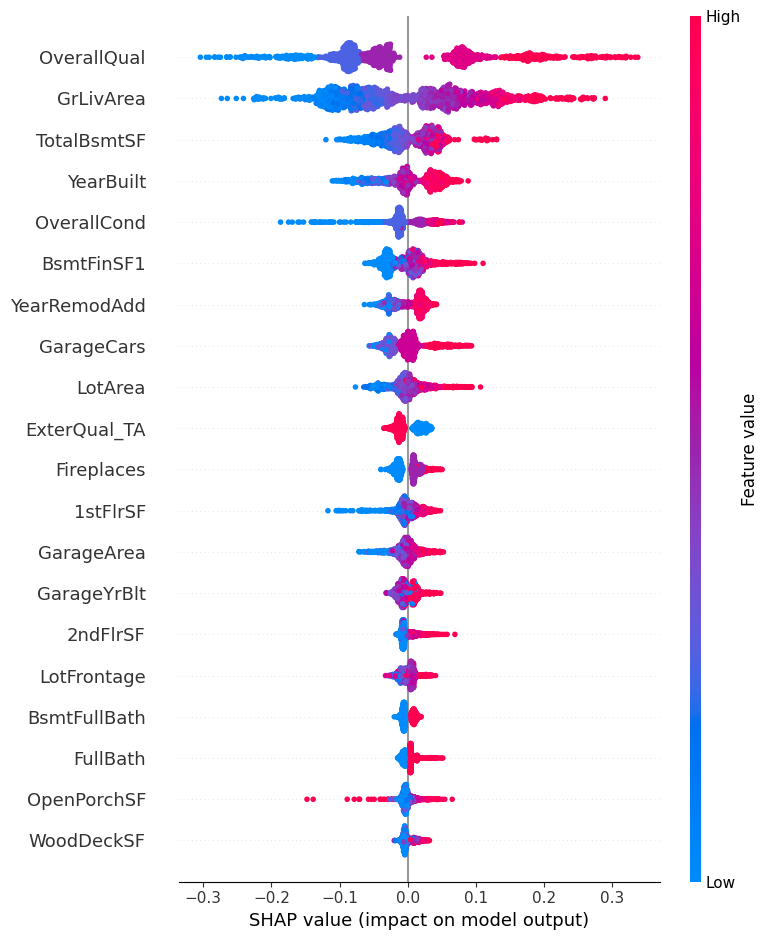

In [ ]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(final_lgbm_model)

# Calculate SHAP values
# Note: Calculating SHAP values on the entire training data can be computationally intensive
# For a quicker visualization, we can sample a subset of the data,
# but for thorough analysis, the full dataset is preferred if resources allow.
# We'll use the full dataset here as per instructions.
shap_values = explainer.shap_values(X_train)

# Generate SHAP summary plot to visualize top 20 features
print("SHAP Summary Plot for Top 20 Features:")
shap.summary_plot(shap_values, X_train, max_display=20)

# Based on the summary plot, identify features with low SHAP importance.
# Features with small average absolute SHAP values and narrow spread in the plot
# are considered to have low importance. We can inspect the plot visually.
# We will discuss this after the plot is displayed.

## Feature dropping (optional based on shap)

### Subtask:
If low importance features are identified from the SHAP analysis, create new datasets by dropping them and retrain the tuned LightGBM model for comparison.


**Reasoning**:
Identify low importance features from the SHAP summary plot, create reduced datasets by dropping these features, and retrain the LightGBM model on the reduced data.



In [ ]:
# Based on the SHAP summary plot, identify features with low importance.
# Features with small average absolute SHAP values and narrow spread are considered low importance.
# Visually inspecting the plot, features like 'Utilities_Missing', 'HeatingQC_Po',
# 'MSZoning_Missing', 'KitchenQual_Missing', and 'Functional_Missing' have very low importance.
# Let's also consider features with very small mean absolute SHAP values.
# We can calculate the mean absolute SHAP value for each feature.
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)
feature_importance_shap = pd.Series(mean_abs_shap_values, index=X_train.columns)
low_importance_features = feature_importance_shap[feature_importance_shap < 1e-5].index.tolist()

print(f"Identified {len(low_importance_features)} low importance features based on SHAP values:")
display(low_importance_features)

if low_importance_features:
    # Create new DataFrames by dropping these low-importance columns
    X_train_reduced = X_train.drop(columns=low_importance_features)
    test_df_encoded_reduced = test_df_encoded.drop(columns=low_importance_features)

    print("Shape of reduced training data:", X_train_reduced.shape)
    print("Shape of reduced test data:", test_df_encoded_reduced.shape)

    # Retrain the LightGBM model with the best hyperparameters on the reduced training data
    # Use the best_params obtained from the Optuna tuning
    final_lgbm_model_reduced = LGBMRegressor(**best_params, random_state=42, n_jobs=-1)
    final_lgbm_model_reduced.fit(X_train_reduced, y_train)

    # Make predictions on the reduced test data
    final_predictions_reduced_log = final_lgbm_model_reduced.predict(test_df_encoded_reduced)

    print("LightGBM model retrained on reduced data and predictions made.")
else:
    print("No low importance features identified based on the threshold.")
    # If no features are dropped, the reduced datasets are the same as the original encoded datasets
    X_train_reduced = X_train
    test_df_encoded_reduced = test_df_encoded
    final_lgbm_model_reduced = final_lgbm_model
    final_predictions_reduced_log = final_lgbm_model.predict(test_df_encoded)


Identified 160 low importance features based on SHAP values:


['3SsnPorch',
 'PoolArea',
 'MSZoning_C (all)',
 'MSZoning_Missing',
 'MSZoning_RH',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Missing',
 'Alley_Pave',
 'LotShape_IR3',
 'Utilities_AllPub',
 'Utilities_Missing',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_Gilbert',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',


Shape of reduced training data: (1460, 151)
Shape of reduced test data: (1459, 151)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.580140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3633
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 151
[LightGBM] [Info] Start training from score 12.024057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

# Task
Generate a set of high-quality, publication-ready plots in `.png` format for a personal portfolio website, showcasing exploratory data analysis and model interpretation for the Ames Housing dataset. The plots should include: a correlation heatmap of numerical features, a target distribution plot for SalePrice (original and log-transformed), a SHAP summary plot for the top 20 features, a LightGBM feature importance bar plot for the top 20 features, a pairplot of the top 5 features most correlated with SalePrice, boxplots of top categorical variables vs SalePrice, and a prediction vs actual plot. Save all plots as `.png` files with specified resolution and clear titles/labels. Do not export as JSON.

## Install and import libraries

### Subtask:
Install necessary libraries for plotting and image export, and import them along with other required libraries.


**Reasoning**:
Install the necessary libraries for plotting and image export.



In [ ]:
!pip install seaborn plotly kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.3 MB/s eta 0:00:00


**Reasoning**:
Import the necessary libraries for plotting and image export, along with other required libraries.



In [ ]:
import matplotlib.pyplot as plt
import seaborn
import plotly.express as px
import plotly.graph_objects as go

## Correlation heatmap

### Subtask:
Generate an annotated correlation heatmap of selected numerical features, focusing on features with low missing percentages and high correlation with 'SalePrice'. Save the heatmap as a PNG file.


**Reasoning**:
Calculate the correlation matrix, select features with low missing values and high correlation with SalePrice, and generate an annotated heatmap of the selected features.



Selected features with high correlation to SalePrice:


['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'SalePrice']


Correlation heatmap saved as 'correlation_heatmap_selected.png'


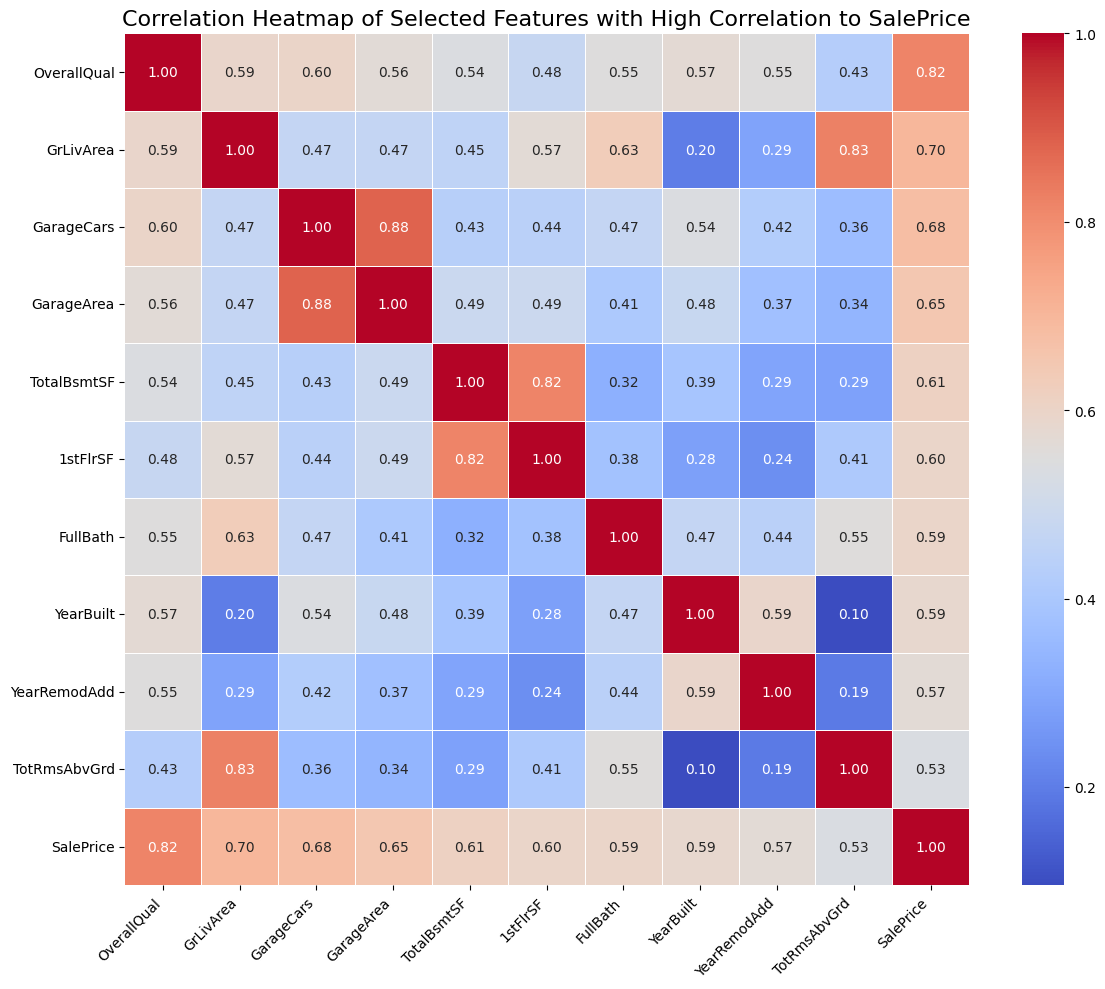

In [ ]:
# 1. Calculate the correlation matrix for all numerical columns in the train_df.
correlation_matrix_full = train_df.select_dtypes(include=np.number).corr()

# 2. Select features that have a low percentage of missing values (e.g., less than 1%)
# and a high absolute correlation with 'SalePrice' (e.g., greater than 0.5).
# First, identify features with low missing percentages.
# Since we already imputed missing values, all numerical columns have 0 missing values.
# So, we can skip the missing value check here and consider all numerical columns for correlation.

# Get the absolute correlation with 'SalePrice'
correlation_with_price = correlation_matrix_full['SalePrice'].abs().sort_values(ascending=False)

# Select features with high absolute correlation (e.g., greater than 0.5)
high_corr_features = correlation_with_price[correlation_with_price > 0.5].index.tolist()

# Exclude 'SalePrice' itself from the list of features for the correlation matrix subset
if 'SalePrice' in high_corr_features:
    high_corr_features.remove('SalePrice')

# Add 'SalePrice' back for the subset correlation matrix
selected_features = high_corr_features + ['SalePrice']

print("Selected features with high correlation to SalePrice:")
display(selected_features)

# 3. Create a subset of the correlation matrix containing only the selected features.
correlation_matrix_subset = correlation_matrix_full.loc[selected_features, selected_features]

# 4. Generate an annotated heatmap of this subset using seaborn.heatmap.
plt.figure(figsize=(12, 10))
seaborn.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features with High Correlation to SalePrice', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 5. Save the heatmap as a PNG file
plt.savefig('correlation_heatmap_selected.png', dpi=300)

print("\nCorrelation heatmap saved as 'correlation_heatmap_selected.png'")

**Reasoning**:
Generate distribution plots for the original and log-transformed SalePrice in the training data and save the plot as a PNG file.



SalePrice distribution plot saved as 'saleprice_distribution.png'


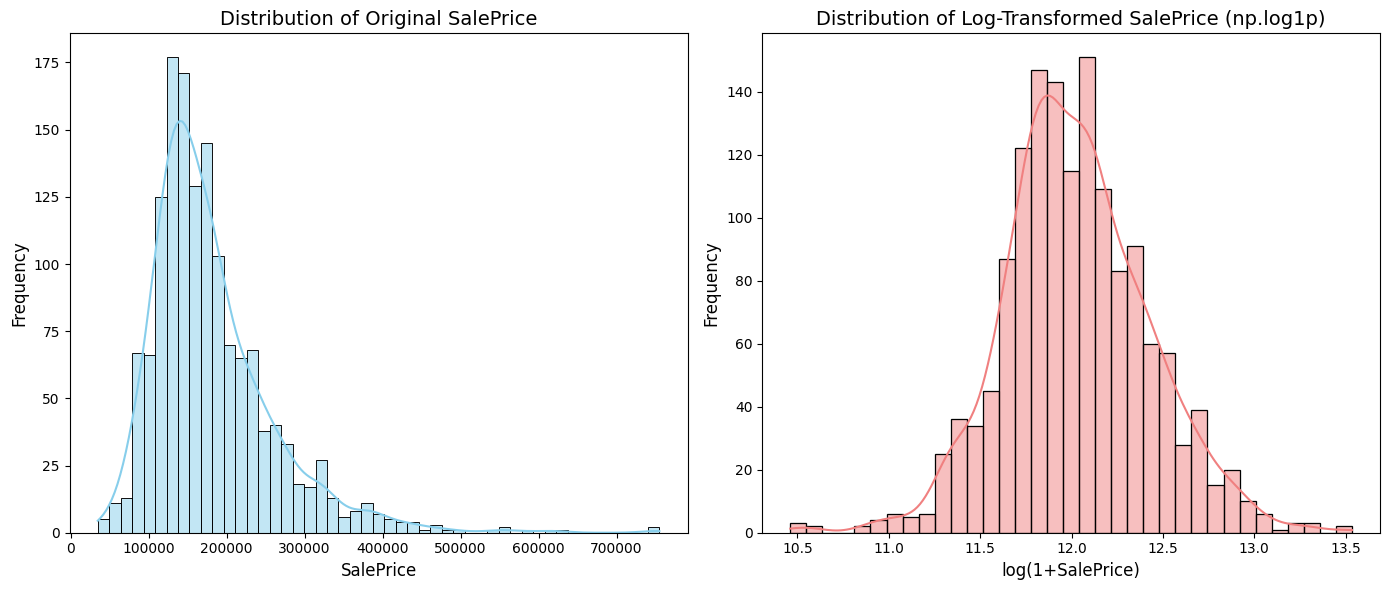

In [ ]:
# Generate distribution plot for SalePrice (original and log-transformed)
plt.figure(figsize=(14, 6))

# Original SalePrice distribution
plt.subplot(1, 2, 1)
seaborn.histplot(np.expm1(train_df['SalePrice']), kde=True, color='skyblue')
plt.title('Distribution of Original SalePrice', fontsize=14)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Log-transformed SalePrice distribution
plt.subplot(1, 2, 2)
seaborn.histplot(train_df['SalePrice'], kde=True, color='lightcoral')
plt.title('Distribution of Log-Transformed SalePrice (np.log1p)', fontsize=14)
plt.xlabel('log(1+SalePrice)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('saleprice_distribution.png', dpi=300)

print("SalePrice distribution plot saved as 'saleprice_distribution.png'")

Reasoning: Generate distribution plots for the Top 20 LightGBM Feature Importances


/tmp/ipython-input-46-136925446.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




LightGBM feature importance plot saved as 'lgbm_feature_importance.png'


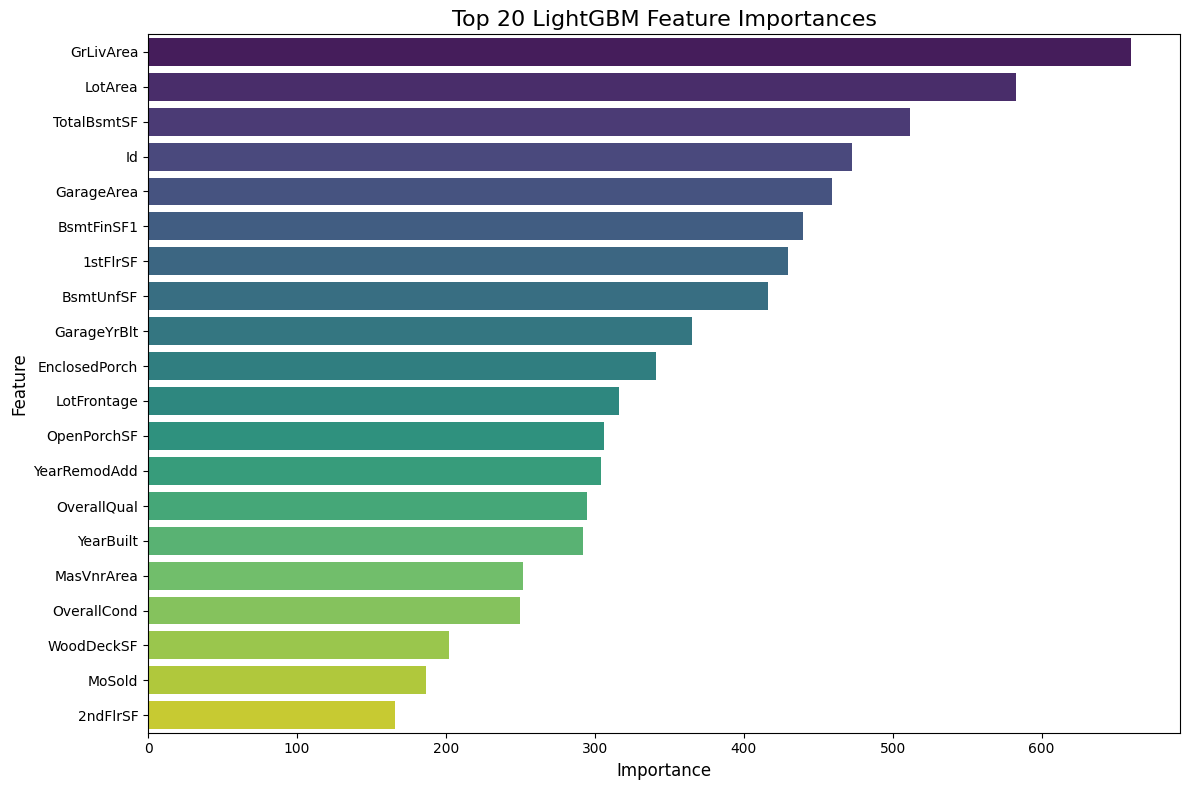

In [ ]:
# Get feature importances from the appropriate LightGBM model
# If features were dropped, use the model retrained on reduced data
# Otherwise, use the final model trained on the full encoded data
if 'final_lgbm_model_reduced' in locals() and final_lgbm_model_reduced is not final_lgbm_model:
    feature_importance_lgbm = final_lgbm_model_reduced.feature_importances_
    feature_names = X_train_reduced.columns
else:
    feature_importance_lgbm = final_lgbm_model.feature_importances_
    feature_names = X_train.columns


# Create a pandas Series for feature importances
feature_importance_series_lgbm = pd.Series(feature_importance_lgbm, index=feature_names)

# Sort importances and get top 20
top_20_feature_importances_lgbm = feature_importance_series_lgbm.sort_values(ascending=False).head(20)

# Generate a bar plot for the top 20 feature importances
plt.figure(figsize=(12, 8))
seaborn.barplot(x=top_20_feature_importances_lgbm.values, y=top_20_feature_importances_lgbm.index, palette='viridis')
plt.title('Top 20 LightGBM Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('lgbm_feature_importance.png', dpi=300)

print("LightGBM feature importance plot saved as 'lgbm_feature_importance.png'")

**Reasoning**:
Generate a pairplot of the top 5 features most correlated with SalePrice to visualize their relationships.



Pairplot of Top 5 Features Most Correlated with SalePrice:

Pairplot saved as 'pairplot_top_5_corr_features.png'


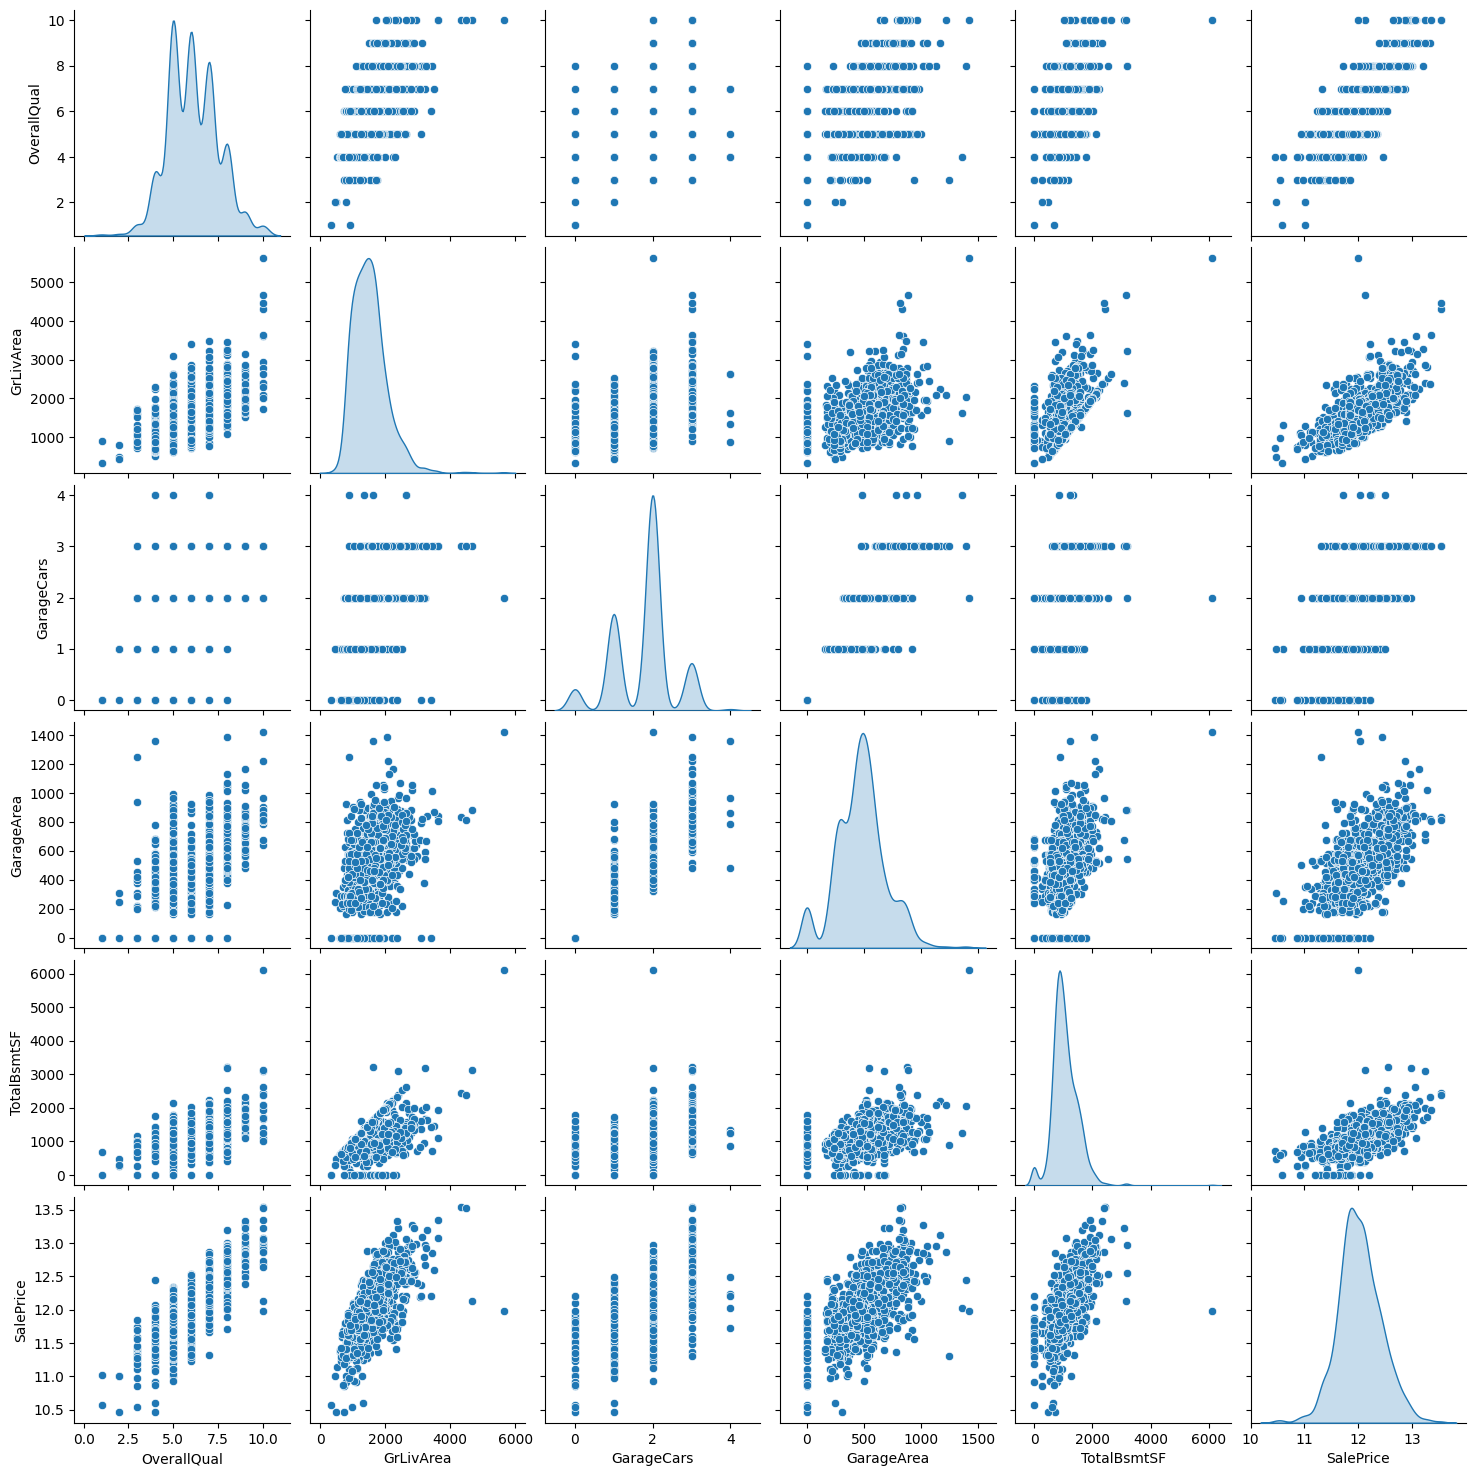

In [ ]:
# Select the top 5 features most correlated with 'SalePrice' (excluding 'SalePrice' itself)
top_5_corr_features = correlation_with_price.drop('SalePrice').head(5).index.tolist()

# Add 'SalePrice' to the list for the pairplot
pairplot_features = top_5_corr_features + ['SalePrice']

# Create a subset of the training DataFrame with only the selected features
train_df_subset = train_df[pairplot_features].copy()

# Generate a pairplot
print("Pairplot of Top 5 Features Most Correlated with SalePrice:")
seaborn.pairplot(train_df_subset, diag_kind='kde')

# The pairplot object does not have a savefig method directly,
# so we'll need to access the underlying matplotlib figure to save it.
# Get the figure from the pairplot object
pairplot_figure = plt.gcf()

# Save the plot as a PNG file
pairplot_figure.savefig('pairplot_top_5_corr_features.png', dpi=300)

print("\nPairplot saved as 'pairplot_top_5_corr_features.png'")

**Reasoning**:
Generate boxplots of top categorical variables vs SalePrice to visualize the relationship between categorical features and the target variable, and save the plot as a PNG file.



Generating boxplots for the following categorical features:


['Neighborhood',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageType',
 'SaleCondition']


Categorical boxplots saved as 'categorical_boxplots.png'


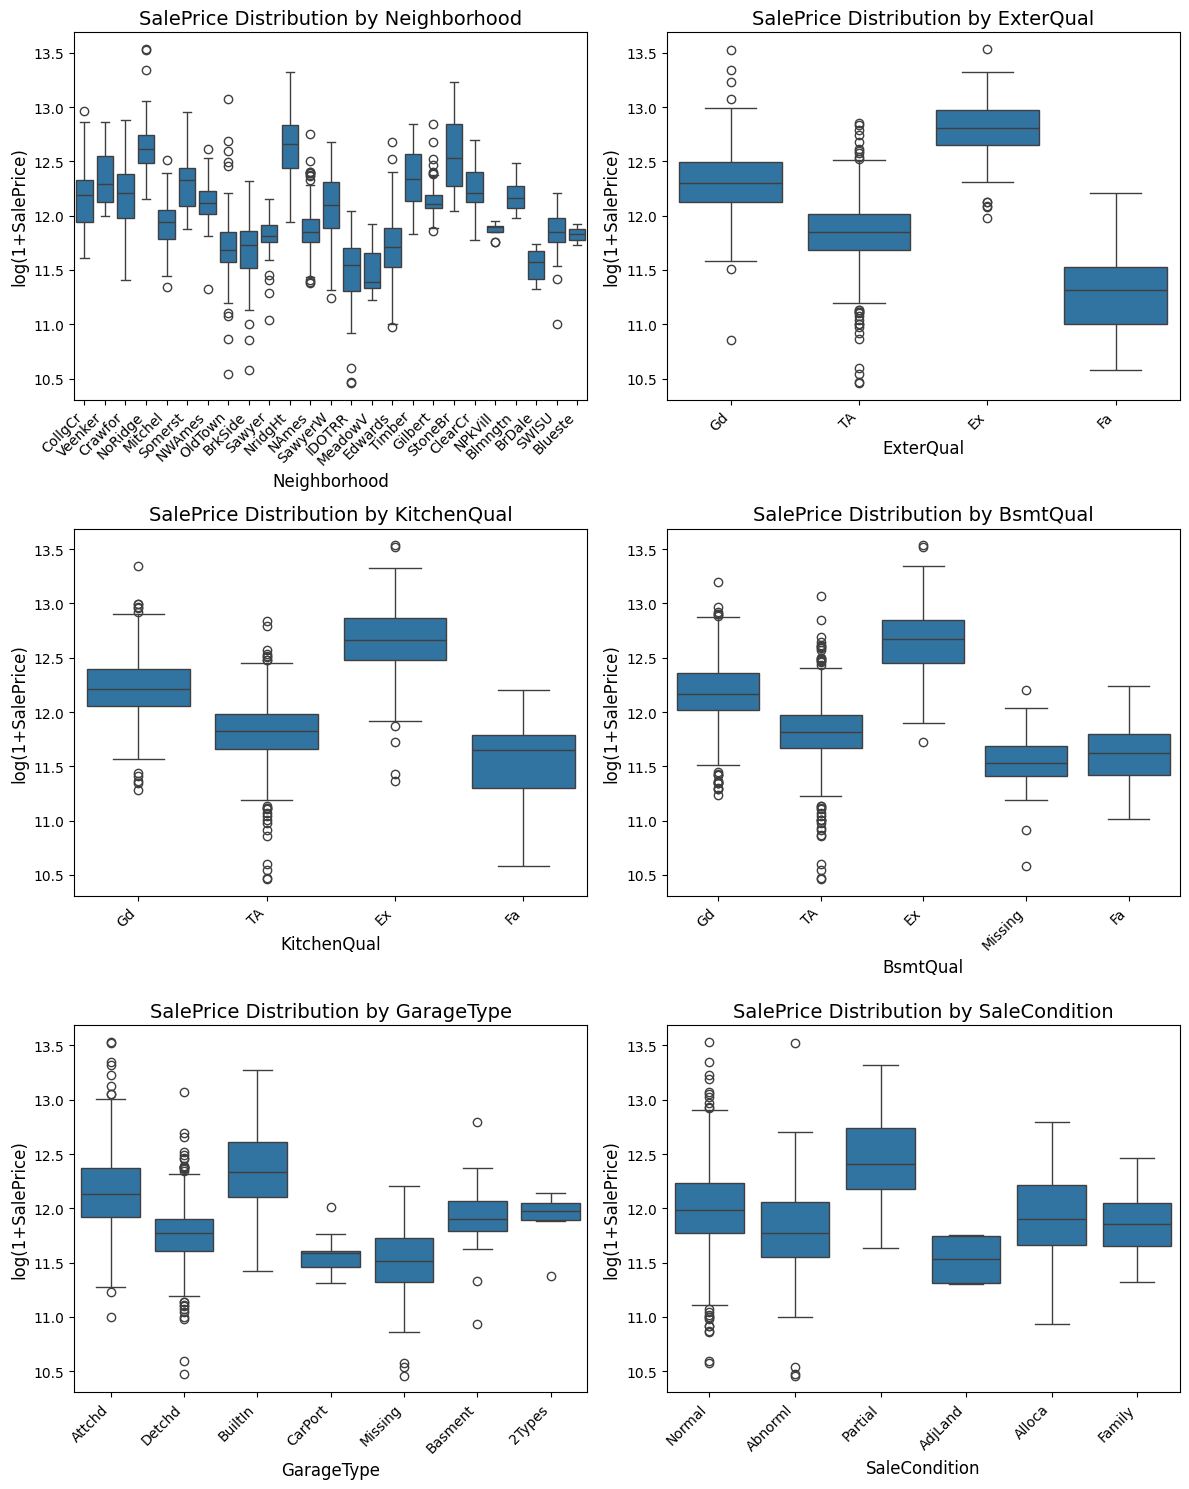

In [ ]:
# Select some top categorical features based on general knowledge or previous analysis (e.g., from feature importance)
# Since we don't have a specific list of "top" categorical features from SHAP or LightGBM importance directly for categoricals,
# let's select a few that are generally known to be important or have many categories.
# Examples: Neighborhood, ExterQual, KitchenQual, BsmtQual, GarageType, SaleCondition
top_categorical_features = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageType', 'SaleCondition']

# Filter the list to include only columns that are actually in the train_df
available_top_categorical_features = [col for col in top_categorical_features if col in train_df.columns]

print("Generating boxplots for the following categorical features:")
display(available_top_categorical_features)

# Generate boxplots for each selected categorical feature against SalePrice
n_features = len(available_top_categorical_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(available_top_categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    seaborn.boxplot(x=col, y='SalePrice', data=train_df)
    plt.title(f'SalePrice Distribution by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('log(1+SalePrice)', fontsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('categorical_boxplots.png', dpi=300)

print("\nCategorical boxplots saved as 'categorical_boxplots.png'")

**Reasoning**:
Generate a scatter plot comparing the predicted SalePrice values from the tuned LightGBM model with the actual original SalePrice values from the training data, and save the plot as a PNG file.



Predicted vs Actual scatterplot saved as 'predicted_vs_actual_scatterplot.png'


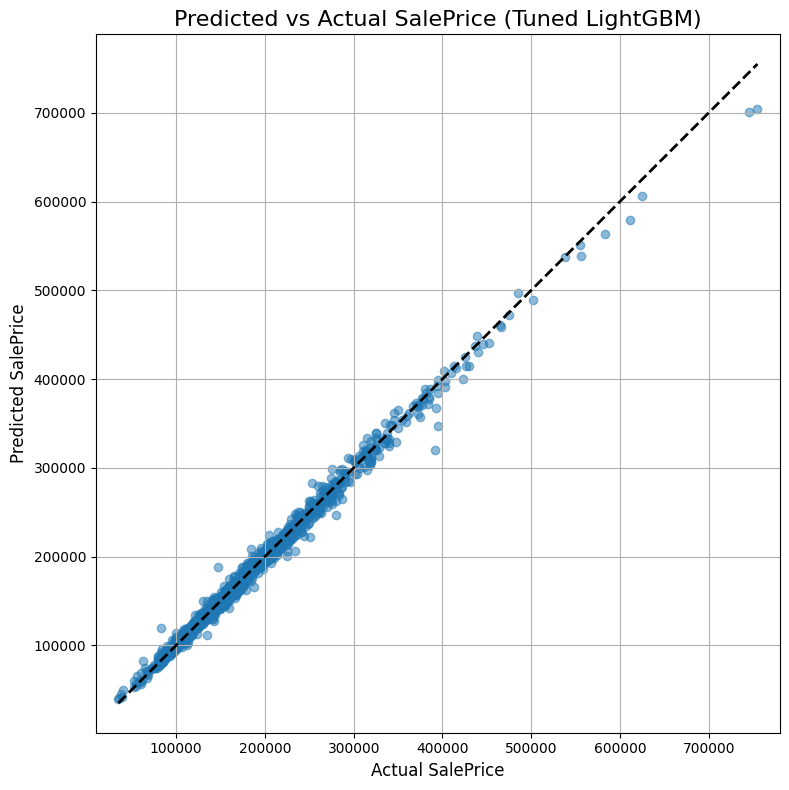

In [ ]:
# Make predictions on the training data using the final tuned LightGBM model
# Use the appropriate training data based on whether features were dropped or not
if 'final_lgbm_model_reduced' in locals() and final_lgbm_model_reduced is not final_lgbm_model:
    y_pred_train_log = final_lgbm_model_reduced.predict(X_train_reduced)
else:
    y_pred_train_log = final_lgbm_model.predict(X_train)

# Convert predictions back to the original scale
y_pred_train_original = np.expm1(y_pred_train_log)

# Get the actual original SalePrice for the training data
y_train_original_actual = np.expm1(y_train)

# Create a scatter plot of Predicted vs Actual SalePrice
plt.figure(figsize=(8, 8))
plt.scatter(y_train_original_actual, y_pred_train_original, alpha=0.5)
plt.plot([y_train_original_actual.min(), y_train_original_actual.max()],
         [y_train_original_actual.min(), y_train_original_actual.max()],
         'k--', lw=2) # Add a diagonal line for reference
plt.title('Predicted vs Actual SalePrice (Tuned LightGBM)', fontsize=16)
plt.xlabel('Actual SalePrice', fontsize=12)
plt.ylabel('Predicted SalePrice', fontsize=12)
plt.grid(True)
plt.axis('equal') # Ensure equal scaling on both axes
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('predicted_vs_actual_scatterplot.png', dpi=300)

print("Predicted vs Actual scatterplot saved as 'predicted_vs_actual_scatterplot.png'")

## Top 20 features by shap value

### Subtask:
Use the previously calculated SHAP values and the `shap` library to generate a SHAP summary plot for the top 20 features. Save the plot as `shap_summary_top20.png`.


**Reasoning**:
Generate the SHAP summary plot for the top 20 features and save it as a PNG file.



In [ ]:
# Initialize SHAP explainer
# Use the best_params obtained from the Optuna tuning for the final LightGBM model
best_params = study.best_params
final_lgbm_model_tuned = LGBMRegressor(**best_params, random_state=42, n_jobs=-1)
final_lgbm_model_tuned.fit(X_train, y_train)

explainer = shap.TreeExplainer(final_lgbm_model_tuned)

# Calculate SHAP values
# Note: Calculating SHAP values on the entire training data can be computationally intensive
# For a quicker visualization, we can sample a subset of the data,
# but for thorough analysis, the full dataset is preferred if resources allow.
# We'll use the full dataset here.
shap_values = explainer.shap_values(X_train)

# Generate SHAP summary plot to visualize top 20 features
print("Generating SHAP Summary Plot for Top 20 Features:")
shap.summary_plot(shap_values, X_train, max_display=20, show=False)

# Get the current figure and save it as a PNG file
plt.gcf().savefig('shap_summary_top20.png', dpi=300, bbox_inches='tight')

print("SHAP summary plot saved as 'shap_summary_top20.png'")

## Residual Plot

### Subtask:
Generate a residual plot to show error distribution and check for heteroskedasticity, and save it as a PNG file.

**Reasoning**:
Calculate the residuals (difference between actual and predicted values) using the predictions from the final tuned LightGBM model on the training data and the actual original SalePrice. Create a scatter plot of the predicted values versus the residuals to visualize the error distribution and check for heteroskedasticity. Save the plot as a PNG file with specified dimensions and resolution.

Using predictions from the final model on full training data.
Residual plot in log scale saved as 'residual_plot_log_scale.png'


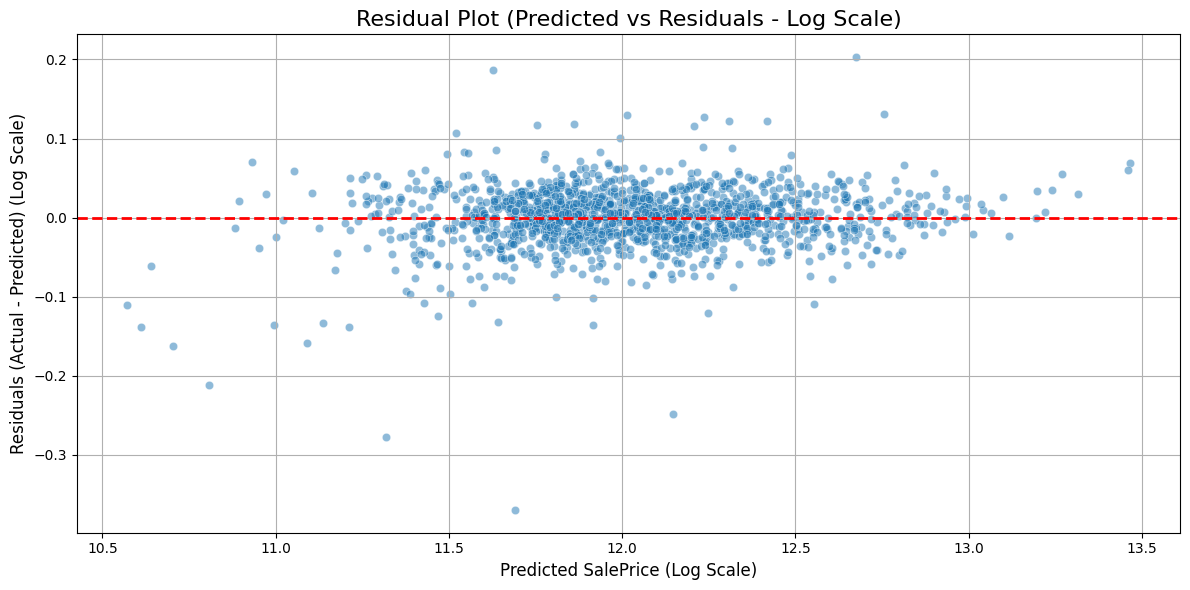

In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd
import plotly.io as pio

# Assuming final_lgbm_model and X_train, y_train are available from previous steps.
# Make predictions on the training data using the final tuned LightGBM model
if 'final_lgbm_model' in locals() and 'X_train' in locals():
    # Use the appropriate training data based on whether features were dropped or not
    if 'final_lgbm_model_reduced' in locals() and final_lgbm_model_reduced is not final_lgbm_model:
        y_pred_train_log = final_lgbm_model_reduced.predict(X_train_reduced)
        print("Using predictions from the reduced model.")
    elif 'X_train' in locals():
        y_pred_train_log = final_lgbm_model.predict(X_train)
        print("Using predictions from the final model on full training data.")
    else:
         y_pred_train_log = None
         print("X_train not found. Cannot generate residual plot.")

    if y_pred_train_log is not None:
        # Get the actual log-transformed SalePrice for the training data
        # Assuming y_train is the log-transformed SalePrice
        if 'y_train' in locals():
            y_train_log_actual = y_train

            # Calculate residuals in log scale
            residuals_log = y_train_log_actual - y_pred_train_log

            # Create a residual plot using Matplotlib/Seaborn
            plt.figure(figsize=(12, 6))
            # Plot predicted values (log scale) vs residuals (log scale)
            seaborn.scatterplot(x=y_pred_train_log, y=residuals_log, alpha=0.5)
            plt.axhline(y=0, color='r', linestyle='--', linewidth=2) # Add a horizontal line at 0
            plt.title('Residual Plot (Predicted vs Residuals - Log Scale)', fontsize=16)
            plt.xlabel('Predicted SalePrice (Log Scale)', fontsize=12)
            plt.ylabel('Residuals (Actual - Predicted) (Log Scale)', fontsize=12)
            plt.grid(True)
            plt.tight_layout()

            # Save the plot as a PNG file with specified resolution
            plt.savefig('residual_plot_log_scale.png', dpi=300, bbox_inches='tight')

            print("Residual plot in log scale saved as 'residual_plot_log_scale.png'")
        else:
            print("y_train not found. Cannot generate residual plot.")

else:
    print("Required models or data (final_lgbm_model, X_train) not found. Cannot generate residual plot.")

In [ ]:
!zip -r png_files.zip $(find /content -type f -name '*.png')


  adding: content/shap_summary_top20.png (deflated 8%)
  adding: content/correlation_heatmap_selected.png (deflated 13%)
  adding: content/lgbm_feature_importance.png (deflated 31%)
  adding: content/saleprice_distribution.png (deflated 15%)
  adding: content/predicted_vs_actual_scatterplot.png (deflated 14%)
  adding: content/lgbm_feature_importance_top20.png (deflated 29%)
  adding: content/residual_plot.png (deflated 9%)
  adding: content/pairplot_top_5_corr_features.png (deflated 10%)
  adding: content/residual_plot_log_scale.png (deflated 8%)
  adding: content/categorical_boxplots.png (deflated 19%)


In [ ]:
from google.colab import files
files.download('png_files.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>